<a href="https://colab.research.google.com/github/radha2006krishna/NLP/blob/main/Assignment_4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 4.2**

In [19]:
import nltk
import spacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer # Import TfidfVectorizer
nltk.download('wordnet')
nltk.download("stopwords")
nltk.download('punkt_tab')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [4]:
a=pd.read_csv('/content/IMDB Dataset.csv')

In [5]:
a.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# **Sentence Tokenization**

In [9]:
nltk_sentences = sent_tokenize(a['review'].iloc[0])
print("NLTK Sentences:")
nltk_sentences

NLTK Sentences:


["One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked.",
 'They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO.',
 'Trust me, this is not a show for the faint hearted or timid.',
 'This show pulls no punches with regards to drugs, sex or violence.',
 'Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary.',
 'It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda.',
 "Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of 

# **Word Tokenization**

In [11]:
nltk_words = word_tokenize(a['review'].iloc[0])
print("NLTK Words:")
nltk_words

NLTK Words:


['One',
 'of',
 'the',
 'other',
 'reviewers',
 'has',
 'mentioned',
 'that',
 'after',
 'watching',
 'just',
 '1',
 'Oz',
 'episode',
 'you',
 "'ll",
 'be',
 'hooked',
 '.',
 'They',
 'are',
 'right',
 ',',
 'as',
 'this',
 'is',
 'exactly',
 'what',
 'happened',
 'with',
 'me.',
 '<',
 'br',
 '/',
 '>',
 '<',
 'br',
 '/',
 '>',
 'The',
 'first',
 'thing',
 'that',
 'struck',
 'me',
 'about',
 'Oz',
 'was',
 'its',
 'brutality',
 'and',
 'unflinching',
 'scenes',
 'of',
 'violence',
 ',',
 'which',
 'set',
 'in',
 'right',
 'from',
 'the',
 'word',
 'GO',
 '.',
 'Trust',
 'me',
 ',',
 'this',
 'is',
 'not',
 'a',
 'show',
 'for',
 'the',
 'faint',
 'hearted',
 'or',
 'timid',
 '.',
 'This',
 'show',
 'pulls',
 'no',
 'punches',
 'with',
 'regards',
 'to',
 'drugs',
 ',',
 'sex',
 'or',
 'violence',
 '.',
 'Its',
 'is',
 'hardcore',
 ',',
 'in',
 'the',
 'classic',
 'use',
 'of',
 'the',
 'word.',
 '<',
 'br',
 '/',
 '>',
 '<',
 'br',
 '/',
 '>',
 'It',
 'is',
 'called',
 'OZ',
 'as',


# **Stemming**

In [12]:
stemmer = PorterStemmer()
words = nltk_words
stemmed_words = [stemmer.stem(word) for word in words]
stemmed_words

['one',
 'of',
 'the',
 'other',
 'review',
 'ha',
 'mention',
 'that',
 'after',
 'watch',
 'just',
 '1',
 'oz',
 'episod',
 'you',
 "'ll",
 'be',
 'hook',
 '.',
 'they',
 'are',
 'right',
 ',',
 'as',
 'thi',
 'is',
 'exactli',
 'what',
 'happen',
 'with',
 'me.',
 '<',
 'br',
 '/',
 '>',
 '<',
 'br',
 '/',
 '>',
 'the',
 'first',
 'thing',
 'that',
 'struck',
 'me',
 'about',
 'oz',
 'wa',
 'it',
 'brutal',
 'and',
 'unflinch',
 'scene',
 'of',
 'violenc',
 ',',
 'which',
 'set',
 'in',
 'right',
 'from',
 'the',
 'word',
 'go',
 '.',
 'trust',
 'me',
 ',',
 'thi',
 'is',
 'not',
 'a',
 'show',
 'for',
 'the',
 'faint',
 'heart',
 'or',
 'timid',
 '.',
 'thi',
 'show',
 'pull',
 'no',
 'punch',
 'with',
 'regard',
 'to',
 'drug',
 ',',
 'sex',
 'or',
 'violenc',
 '.',
 'it',
 'is',
 'hardcor',
 ',',
 'in',
 'the',
 'classic',
 'use',
 'of',
 'the',
 'word.',
 '<',
 'br',
 '/',
 '>',
 '<',
 'br',
 '/',
 '>',
 'it',
 'is',
 'call',
 'oz',
 'as',
 'that',
 'is',
 'the',
 'nicknam',
 'g

# **Lemmatization**

In [13]:
lemmatizer = WordNetLemmatizer()
nltk_lemmas = [lemmatizer.lemmatize(token) for token in nltk_words]
print("NLTK Lemmatization Output:")
nltk_lemmas

NLTK Lemmatization Output:


['One',
 'of',
 'the',
 'other',
 'reviewer',
 'ha',
 'mentioned',
 'that',
 'after',
 'watching',
 'just',
 '1',
 'Oz',
 'episode',
 'you',
 "'ll",
 'be',
 'hooked',
 '.',
 'They',
 'are',
 'right',
 ',',
 'a',
 'this',
 'is',
 'exactly',
 'what',
 'happened',
 'with',
 'me.',
 '<',
 'br',
 '/',
 '>',
 '<',
 'br',
 '/',
 '>',
 'The',
 'first',
 'thing',
 'that',
 'struck',
 'me',
 'about',
 'Oz',
 'wa',
 'it',
 'brutality',
 'and',
 'unflinching',
 'scene',
 'of',
 'violence',
 ',',
 'which',
 'set',
 'in',
 'right',
 'from',
 'the',
 'word',
 'GO',
 '.',
 'Trust',
 'me',
 ',',
 'this',
 'is',
 'not',
 'a',
 'show',
 'for',
 'the',
 'faint',
 'hearted',
 'or',
 'timid',
 '.',
 'This',
 'show',
 'pull',
 'no',
 'punch',
 'with',
 'regard',
 'to',
 'drug',
 ',',
 'sex',
 'or',
 'violence',
 '.',
 'Its',
 'is',
 'hardcore',
 ',',
 'in',
 'the',
 'classic',
 'use',
 'of',
 'the',
 'word.',
 '<',
 'br',
 '/',
 '>',
 '<',
 'br',
 '/',
 '>',
 'It',
 'is',
 'called',
 'OZ',
 'a',
 'that',
 'i

# **Stop Words**

In [15]:
stop_words = set(stopwords.words("english"))
filtered_list = []
for word in words: # Changed 'words_in_quote' to 'words'
    if word.casefold() not in stop_words:
        filtered_list.append(word)
filtered_list

['One',
 'reviewers',
 'mentioned',
 'watching',
 '1',
 'Oz',
 'episode',
 "'ll",
 'hooked',
 '.',
 'right',
 ',',
 'exactly',
 'happened',
 'me.',
 '<',
 'br',
 '/',
 '>',
 '<',
 'br',
 '/',
 '>',
 'first',
 'thing',
 'struck',
 'Oz',
 'brutality',
 'unflinching',
 'scenes',
 'violence',
 ',',
 'set',
 'right',
 'word',
 'GO',
 '.',
 'Trust',
 ',',
 'show',
 'faint',
 'hearted',
 'timid',
 '.',
 'show',
 'pulls',
 'punches',
 'regards',
 'drugs',
 ',',
 'sex',
 'violence',
 '.',
 'hardcore',
 ',',
 'classic',
 'use',
 'word.',
 '<',
 'br',
 '/',
 '>',
 '<',
 'br',
 '/',
 '>',
 'called',
 'OZ',
 'nickname',
 'given',
 'Oswald',
 'Maximum',
 'Security',
 'State',
 'Penitentary',
 '.',
 'focuses',
 'mainly',
 'Emerald',
 'City',
 ',',
 'experimental',
 'section',
 'prison',
 'cells',
 'glass',
 'fronts',
 'face',
 'inwards',
 ',',
 'privacy',
 'high',
 'agenda',
 '.',
 'Em',
 'City',
 'home',
 'many',
 '..',
 'Aryans',
 ',',
 'Muslims',
 ',',
 'gangstas',
 ',',
 'Latinos',
 ',',
 'Christ

In [17]:
positive_reviews = a[a['sentiment'] == 'positive']['review']
negative_reviews = a[a['sentiment'] == 'negative']['review']

In [26]:
positive_reviews

,review
0,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...
2,I thought this was a wonderful way to spend ti...
4,"Petter Mattei's ""Love in the Time of Money"" is..."
5,"Probably my all-time favorite movie, a story o..."
...,...
49983,"I loved it, having been a fan of the original ..."
49985,Imaginary Heroes is clearly the best film of t...
49989,I got this one a few weeks ago and love it! It...
49992,John Garfield plays a Marine who is blinded by...


In [27]:
negative_reviews

,review
3,Basically there's a family where a little boy ...
7,"This show was an amazing, fresh & innovative i..."
8,Encouraged by the positive comments about this...
10,Phil the Alien is one of those quirky films wh...
11,I saw this movie when I was about 12 when it c...
...,...
49994,This is your typical junk comedy.<br /><br />T...
49996,"Bad plot, bad dialogue, bad acting, idiotic di..."
49997,I am a Catholic taught in parochial elementary...
49998,I'm going to have to disagree with the previou...


In [31]:
tfidf_pos = TfidfVectorizer(stop_words=list(stop_words), max_features=5000)
tfidf_neg = TfidfVectorizer(stop_words=list(stop_words), max_features=5000)

In [23]:
tfidf_pos

TfidfVectorizer(max_features=5000,
                stop_words={'a', 'about', 'above', 'after', 'again', 'against',
                            'ain', 'all', 'am', 'an', 'and', 'any', 'are',
                            'aren', "aren't", 'as', 'at', 'be', 'because',
                            'been', 'before', 'being', 'below', 'between',
                            'both', 'but', 'by', 'can', 'couldn', "couldn't", ...})

In [25]:
tfidf_neg

TfidfVectorizer(max_features=5000,
                stop_words={'a', 'about', 'above', 'after', 'again', 'against',
                            'ain', 'all', 'am', 'an', 'and', 'any', 'are',
                            'aren', "aren't", 'as', 'at', 'be', 'because',
                            'been', 'before', 'being', 'below', 'between',
                            'both', 'but', 'by', 'can', 'couldn', "couldn't", ...})

In [33]:
pos_tfidf_matrix = tfidf_pos.fit_transform(positive_reviews)
neg_tfidf_matrix = tfidf_neg.fit_transform(negative_reviews)

pos_scores = np.mean(pos_tfidf_matrix.toarray(), axis=0)
neg_scores = np.mean(neg_tfidf_matrix.toarray(), axis=0)

In [34]:
pos_scores

array([0.00044712, 0.00092389, 0.01145975, ..., 0.00117221, 0.0007349 ,
       0.00063394])

In [35]:
neg_scores

array([0.00056652, 0.00120859, 0.01046598, ..., 0.00292957, 0.00233863,
       0.00064824])

In [36]:
pos_terms = tfidf_pos.get_feature_names_out()
neg_terms = tfidf_neg.get_feature_names_out()

In [38]:
pos_terms

array(['00', '000', '10', ..., 'zombie', 'zombies', 'zone'], dtype=object)

In [39]:
neg_terms

array(['00', '000', '10', ..., 'zombie', 'zombies', 'zone'], dtype=object)

In [40]:
pos_df = pd.DataFrame({'term': pos_terms, 'score': pos_scores})
neg_df = pd.DataFrame({'term': neg_terms, 'score': neg_scores})

In [41]:
pos_df

,term,score
0,00,0.000447
1,000,0.000924
2,10,0.011460
3,100,0.001673
4,11,0.001471
...,...,...
4995,youth,0.001322
4996,zero,0.000708
4997,zombie,0.001172
4998,zombies,0.000735


In [42]:
neg_df

,term,score
0,00,0.000567
1,000,0.001209
2,10,0.010466
3,100,0.001896
4,101,0.000426
...,...,...
4995,zero,0.002001
4996,zoey,0.000380
4997,zombie,0.002930
4998,zombies,0.002339


In [43]:
top_pos = pos_df.sort_values(by='score', ascending=False).head(15)
top_neg = neg_df.sort_values(by='score', ascending=False).head(15)

In [44]:
top_pos

,term,score
560,br,0.104987
2950,movie,0.052894
1745,film,0.049761
3135,one,0.032037
2622,like,0.025213
1969,good,0.024688
1999,great,0.023290
4256,story,0.021466
3911,see,0.020986
4873,well,0.020381


In [45]:
top_neg

,term,score
551,br,0.113804
2937,movie,0.061162
1723,film,0.047146
3125,one,0.032345
2614,like,0.029371
379,bad,0.026157
1946,good,0.023867
1539,even,0.023061
4960,would,0.022204
3572,really,0.021262


# **Side-by-side bar charts comparing both sets**

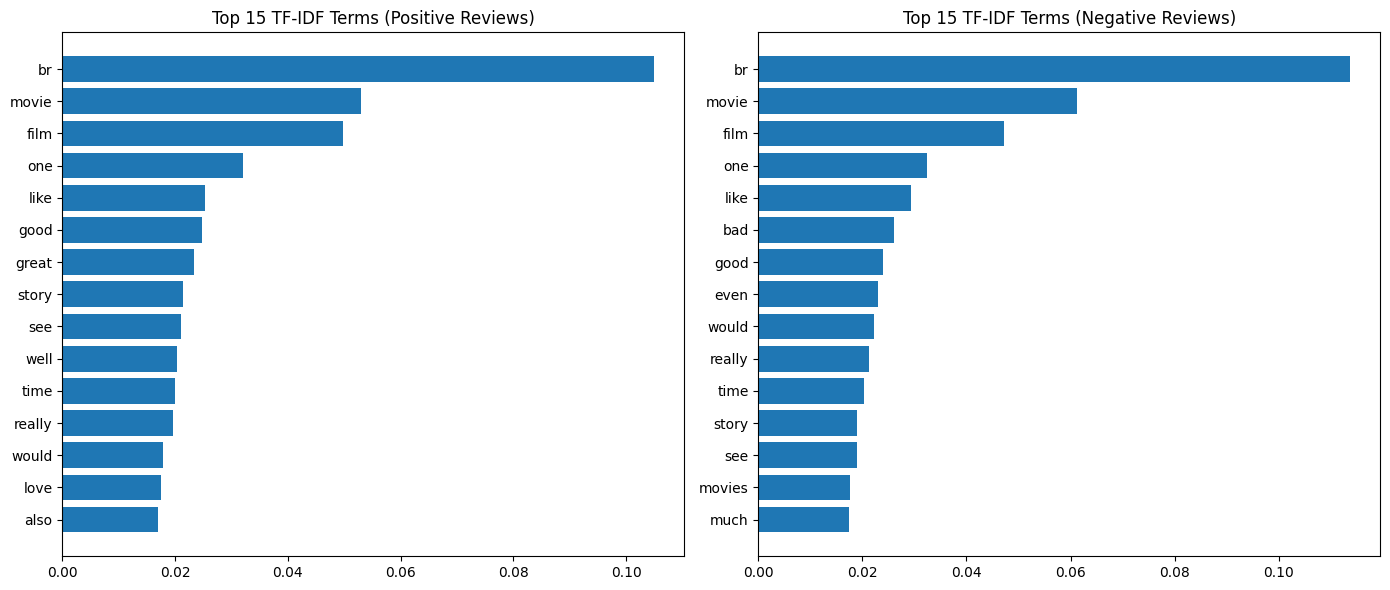

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].barh(top_pos['term'], top_pos['score'])
axes[0].set_title("Top 15 TF-IDF Terms (Positive Reviews)")
axes[0].invert_yaxis()
axes[1].barh(top_neg['term'], top_neg['score'])
axes[1].set_title("Top 15 TF-IDF Terms (Negative Reviews)")
axes[1].invert_yaxis()
plt.tight_layout()
plt.show()